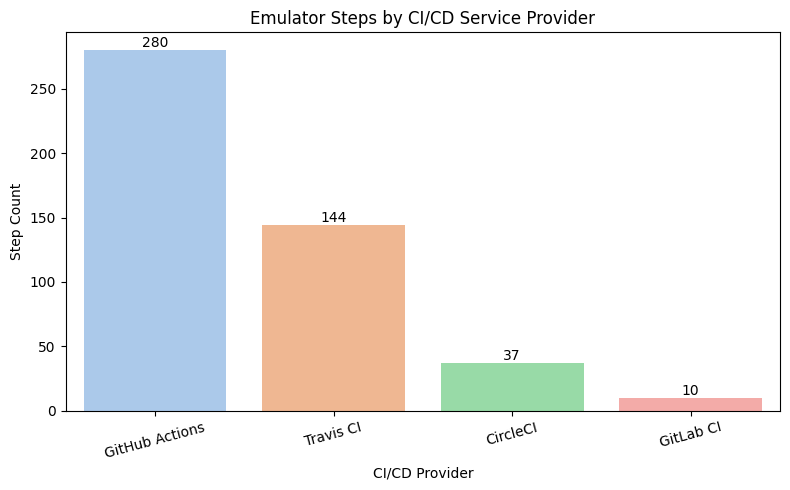

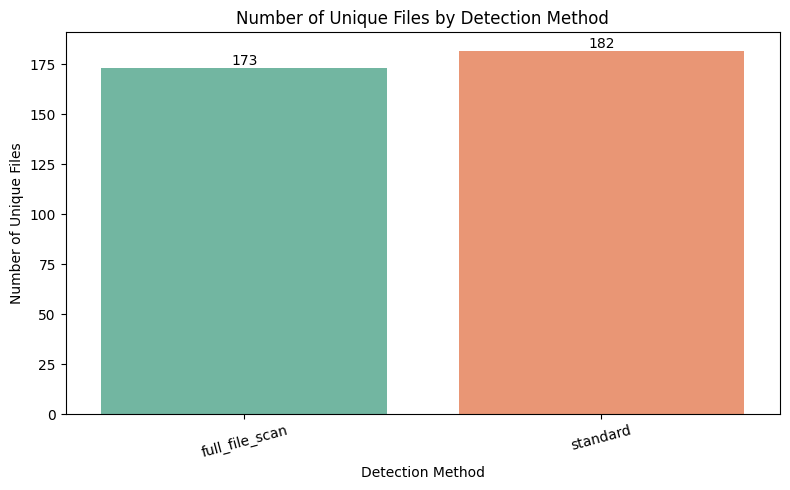


 by improving the search method (using the fallback technique), we were able to detect 173 more yaml files with emulator keywords


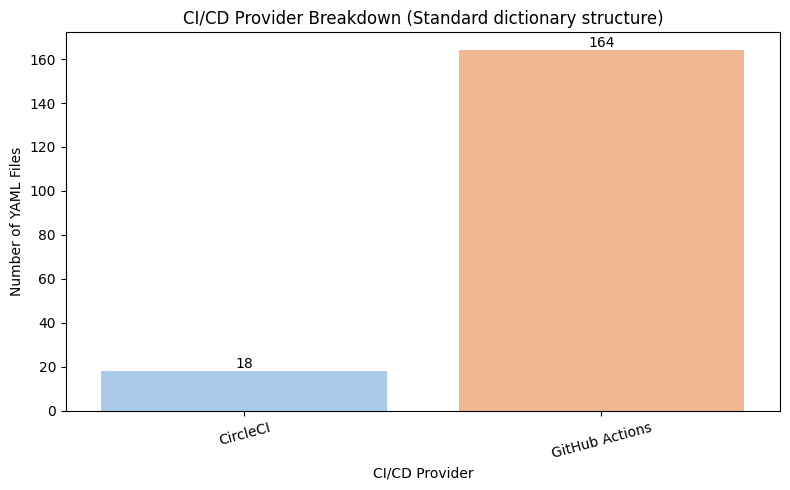


 it seems that the standard search for standard dictionary structure works only on GitHub and CirclCI


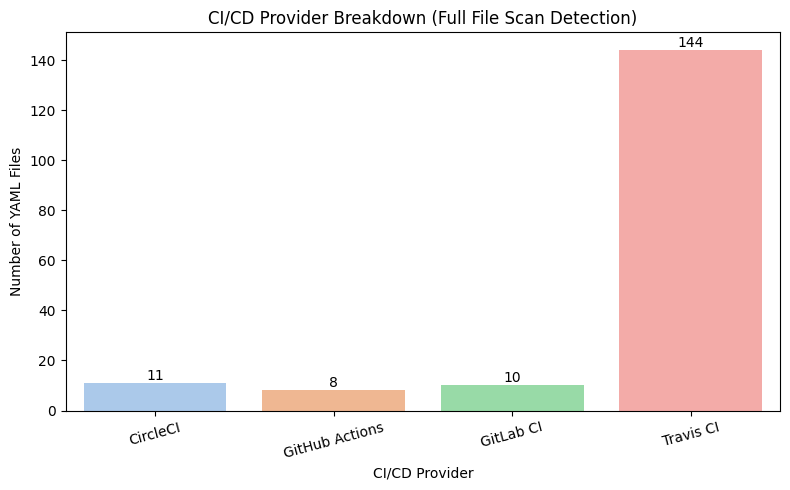


 it seems that the fallback method helped to catch emulator keywords mostly from servcie provider: Travis CI


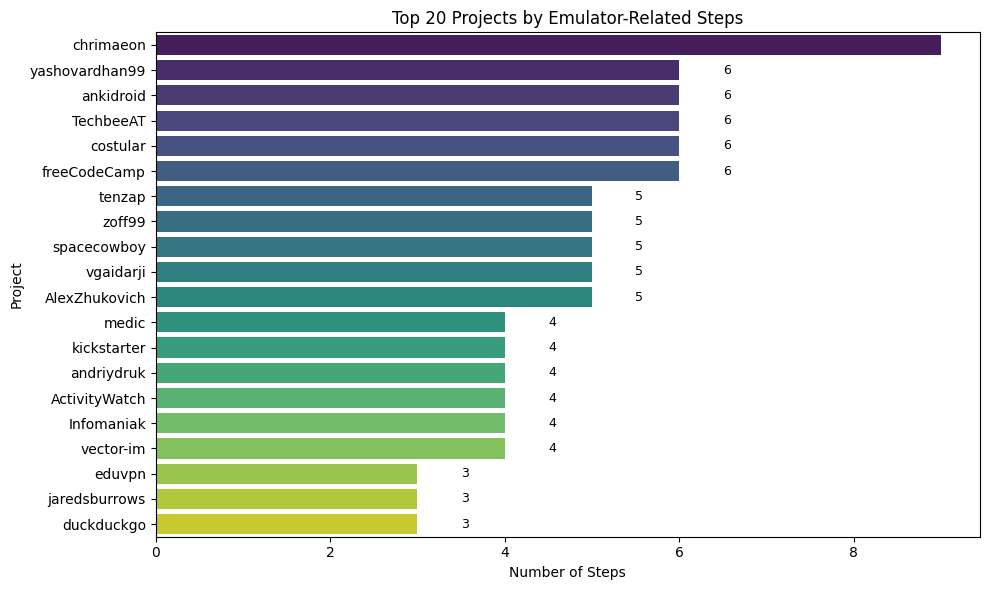

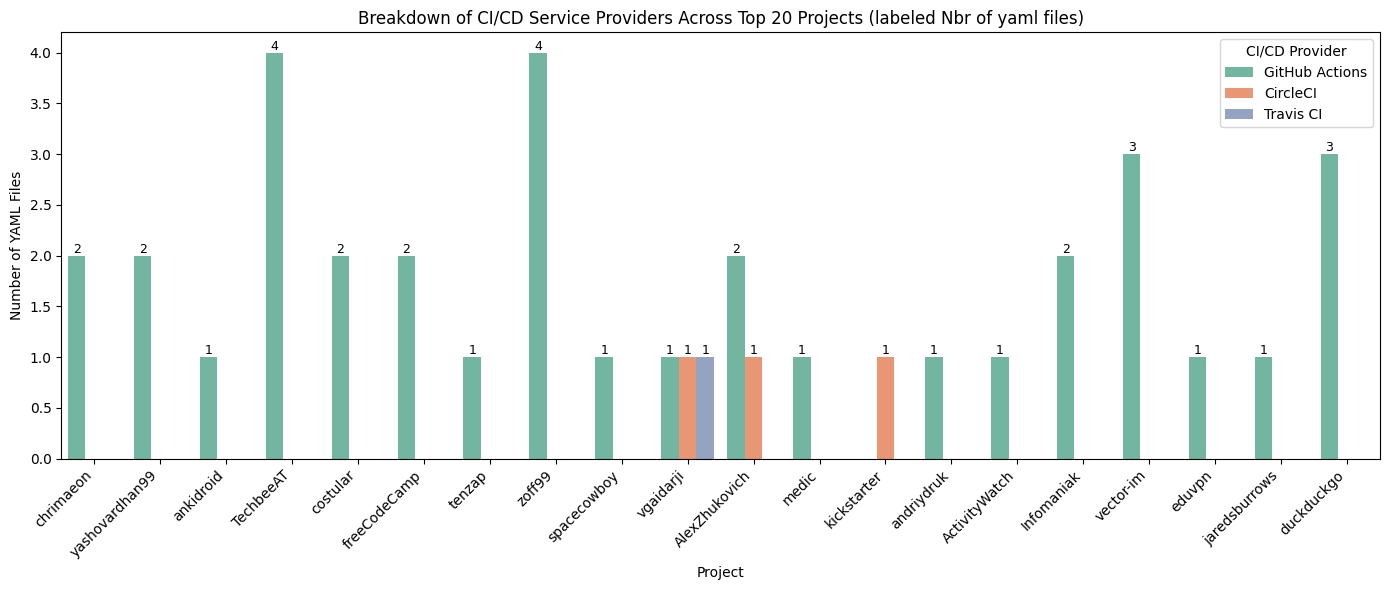

/n there is only one project from travis CI among top 20 emulator steps frequency. while fallback helped to detect mostly from travis CI, 
 a manual check is needed to find out why only one of them is among top 20


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from itertools import chain

# === File path ===
csv_path = r"C:\GitHub\Android-Mobile-Apps\emulator_steps_summary.csv"

# === Load data ===
df = pd.read_csv(csv_path)
df.fillna('', inplace=True)


# == Service Provider detection ==
def infer_provider(file_path):
    path_lower = str(file_path).lower()
    if 'github' in path_lower:
        return 'GitHub Actions'
    elif 'travis' in path_lower:
        return 'Travis CI'
    elif 'circleci' in path_lower:
        return 'CircleCI'
    elif 'bitrise' in path_lower:
        return 'Bitrise'
    elif 'gitlab' in path_lower:
        return 'GitLab CI'
    else:
        return 'Unknown'


# == Chart 1 Emulator Steps detedted per service provider ===

# === 1. Aggregated Totals by CI/CD Provider ===


df['provider'] = df['file'].apply(infer_provider)
provider_counts = df['provider'].value_counts().reset_index()
provider_counts.columns = ['CI/CD Provider', 'Emulator Step Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=provider_counts, x='CI/CD Provider', y='Emulator Step Count',
                 hue='CI/CD Provider', palette='pastel', legend=False)
plt.title('Emulator Steps by CI/CD Service Provider')
plt.xlabel('CI/CD Provider')
plt.ylabel('Step Count')
plt.xticks(rotation=15)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


#== Chart 2 Detection Method breakdown Standard or Fallback=====
# === Count unique files per detection method
file_counts_by_method = df.groupby('detection_method')['file'].nunique().reset_index()
file_counts_by_method.columns = ['detection_method', 'unique_files']

# === 1. number of files for each dectection method  ===
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=file_counts_by_method, x='detection_method', y='unique_files', palette='Set2',hue='detection_method',legend=False)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Unique Files by Detection Method')
plt.xlabel('Detection Method')
plt.ylabel('Number of Unique Files')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\n by improving the search method (using the fallback technique), we were able to detect 173 more yaml files with emulator keywords")


# === CHART 2: CI/CD Provider Breakdown (standard dictionary Detection) ===

# Filter to standard detection method
full_scan_df = df[df['detection_method'] == 'standard'].copy()

# Add provider column if missing
if 'provider' not in full_scan_df.columns:
    full_scan_df['provider'] = full_scan_df['file'].apply(infer_provider)

# Count unique YAML files per provider
provider_breakdown = full_scan_df.groupby('provider')['file'].nunique().reset_index()
provider_breakdown.columns = ['CI/CD Provider', 'YAML File Count']

# Plot chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=provider_breakdown, x='CI/CD Provider', y='YAML File Count', palette='pastel', legend=False, hue='CI/CD Provider')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('CI/CD Provider Breakdown (Standard dictionary structure)')
plt.xlabel('CI/CD Provider')
plt.ylabel('Number of YAML Files')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\n it seems that the standard search for standard dictionary structure works only on GitHub and CirclCI")

# Filter to full_file_scan detection method
full_scan_df = df[df['detection_method'] == 'full_file_scan'].copy()

# Add provider column if missing
if 'provider' not in full_scan_df.columns:
    full_scan_df['provider'] = full_scan_df['file'].apply(infer_provider)

# Count unique YAML files per provider
provider_breakdown = full_scan_df.groupby('provider')['file'].nunique().reset_index()
provider_breakdown.columns = ['CI/CD Provider', 'YAML File Count']

# Plot chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=provider_breakdown, x='CI/CD Provider', y='YAML File Count', palette='pastel', legend=False, hue='CI/CD Provider')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('CI/CD Provider Breakdown (Full File Scan Detection)')
plt.xlabel('CI/CD Provider')
plt.ylabel('Number of YAML Files')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\n it seems that the fallback method helped to catch emulator keywords mostly from servcie provider: Travis CI")
# === 2. Aggregated Totals by Project ===
df['project'] = df['file'].apply(lambda x: os.path.basename(str(x)).split('.')[0])
project_counts = df['project'].value_counts().reset_index()
project_counts.columns = ['project', 'emulator_steps']
top_projects = project_counts.head(20)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_projects, x='emulator_steps', y='project', hue='project', palette='viridis', legend=False)
plt.title('Top 20 Projects by Emulator-Related Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Project')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width + 0.5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# === 4. Number of YAML Files per Top 20 Project ===

# Get list of top 20 project names
top_project_names = top_projects['project'].tolist()

# Filter to only those projects
df_top_projects = df[df['project'].isin(top_project_names)]

# Count unique files per project
yaml_file_counts = df_top_projects.groupby('project')['file'].nunique().reset_index()
yaml_file_counts.columns = ['project', 'yaml_files']

# Sort to match same order as top_projects
yaml_file_counts = yaml_file_counts.set_index('project').loc[top_project_names].reset_index()

# # Plot chart
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=yaml_file_counts, x='yaml_files', y='project', palette='magma',legend=False,hue='project')

# # Add data labels
# for p in ax.patches:
#     width = p.get_width()
#     ax.annotate(f'{int(width)}', (width + 0.5, p.get_y() + p.get_height() / 2),
#                 ha='left', va='center', fontsize=9, color='black')

# plt.title('Number of YAML Files per Top 20 Projects by Emulator Steps')
# plt.xlabel('Number of YAML Files')
# plt.ylabel('Project')
# plt.tight_layout()
# plt.show()


# === 5. CI/CD Provider Breakdown by Project (Grouped Bar Chart) ===

# Count YAML files by project and provider
project_provider_breakdown = (
    df_top_projects.groupby(['project', 'provider'])['file']
    .nunique()
    .reset_index()
    .rename(columns={'file': 'yaml_file_count'})
)

# Ensure top 20 order is preserved
project_provider_breakdown['project'] = pd.Categorical(
    project_provider_breakdown['project'], categories=top_project_names, ordered=True
)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=project_provider_breakdown,
    x='project',
    y='yaml_file_count',
    hue='provider',
    palette='Set2'
)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Breakdown of CI/CD Service Providers Across Top 20 Projects (labeled Nbr of yaml files)')
plt.xlabel('Project')
plt.ylabel('Number of YAML Files')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CI/CD Provider')
plt.tight_layout()
plt.show()

print("/n there is only one project from travis CI among top 20 emulator steps frequency. while fallback helped to detect mostly from travis CI, " \
"\n a manual check is needed to find out why only one of them is among top 20")